In [ ]:
! [ -e /content ] && pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 53.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is 

In [ ]:
from fastai.vision.all import *
import os
from fastai.vision.widgets import *
from fastai.data.all import *
from fastdownload import download_url


In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', 'ADD YOUR AZURE KEY')

**Acquire data**

defining search images bing function, because azure api key is not working

In [ ]:
def search_images_bing(key, term, max_images: int = 100, **kwargs):
    params = {'q':term, 'count':max_images}
    headers = {"Ocp-Apim-Subscription-Key":key}
    search_url = "https://api.bing.microsoft.com/v7.0/images/search"
    response = requests.get(search_url, headers=headers, params=params)
    response.raise_for_status()
    search_results = response.json()

    # returns an L object to be identical to the original function.
    return L(search_results['value'])

Downloading images (100)

In [ ]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)

100

In [ ]:
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [ ]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

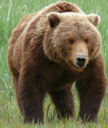

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128)

Putting each bears in different folders

In [ ]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [ ]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

double checking folders

In [ ]:
fns = get_image_files(path)
fns

(#274) [Path('bears/grizzly/e4e66617-d2e9-4697-9e1e-31f9fe759c5c.jpg'),Path('bears/grizzly/18bee93e-8916-4b79-827b-42033ab5a056.jpg'),Path('bears/grizzly/ad8a08cc-060f-4017-819c-c2eb38ca03aa.jpg'),Path('bears/grizzly/f12c6fe0-921e-4375-b6d5-fab07977dc5b.jpg'),Path('bears/grizzly/2ef3e2a7-8826-4935-8763-349a0b8cc40a.jpg'),Path('bears/grizzly/cdd786f1-e652-4228-8eb3-cf5e2b4faee5.jpg'),Path('bears/grizzly/5647a96b-d846-4cbb-8581-6513fe9c7b93.jpg'),Path('bears/grizzly/35ff84c0-3269-4ee2-88e0-c095bead5d70.jpg'),Path('bears/grizzly/7661cbff-3602-4174-af40-fc251c12a4c7.jpg'),Path('bears/grizzly/7930a00e-c963-46b5-b0f7-d7108650ba34.jpg')...]

removing corrupt files

In [ ]:
failed = verify_images(fns)
failed

(#10) [Path('bears/grizzly/6625735f-29f4-4802-a90d-a37bd618a583.jpg'),Path('bears/grizzly/537dabec-cc40-4ce3-a339-82c2204a2830.JPG'),Path('bears/grizzly/ac461a2c-be90-43b9-96e8-8d474fca7c93.jpg'),Path('bears/grizzly/7a634d4c-ea80-4a6f-a323-77d4e343acf6.jpg'),Path('bears/black/c0a28cb8-a9d3-4113-a459-4cea6822988f.jpg'),Path('bears/teddy/4518bbb2-4991-4264-9806-85221a7e1a00.jpg'),Path('bears/teddy/a2231370-f84a-4439-bf5d-fb14e26ab09c.jpg'),Path('bears/teddy/2fb71803-2093-4dd8-ae7f-827ad3bb59e0.jpg'),Path('bears/teddy/139c56dd-39bc-4fc9-8e58-0ed6699efb27.JPG'),Path('bears/teddy/d4f1eaf5-9316-4ad6-800d-53352675e487.jpg')]

In [ ]:
failed.map(Path.unlink)

(#10) [None,None,None,None,None,None,None,None,None,None]

**datablocks and dataloaders**







In [ ]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = bears.dataloaders(path)

visualise

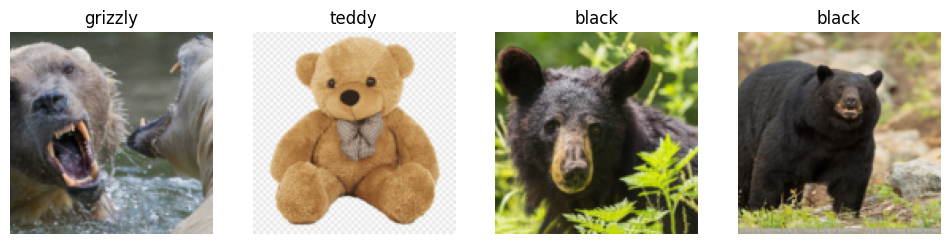

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

Data augmentation

using aug_tranforms (rotation, flipping, perspective warping, brightness changes and contrast changes)

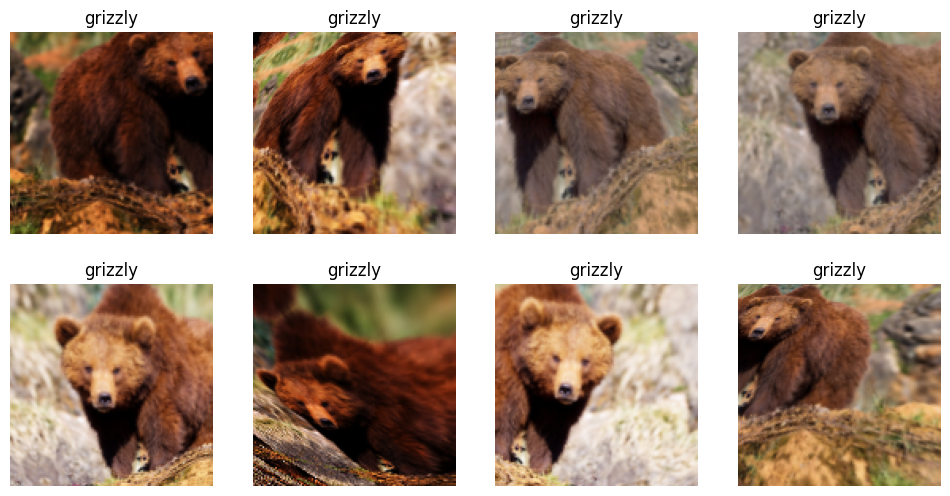

In [ ]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

example of randomresizedcrop

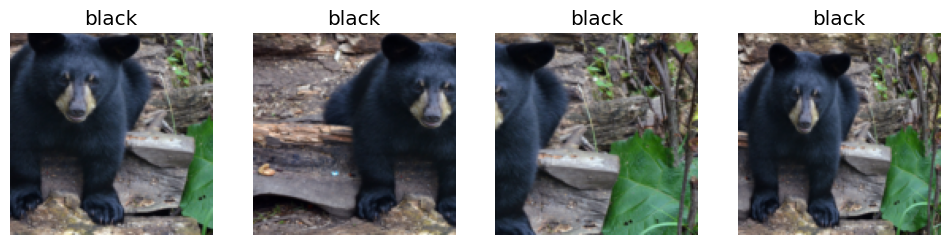

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

**creating model**

In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

creating learner

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 97.4MB/s]


**Visualising the results**

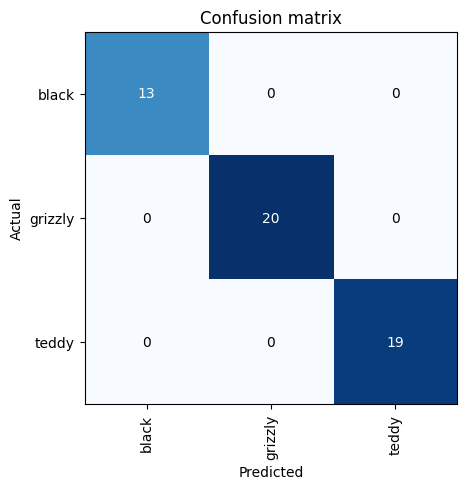

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

loss is higher if the model is incorrect, or correct but not confident of its correct answer

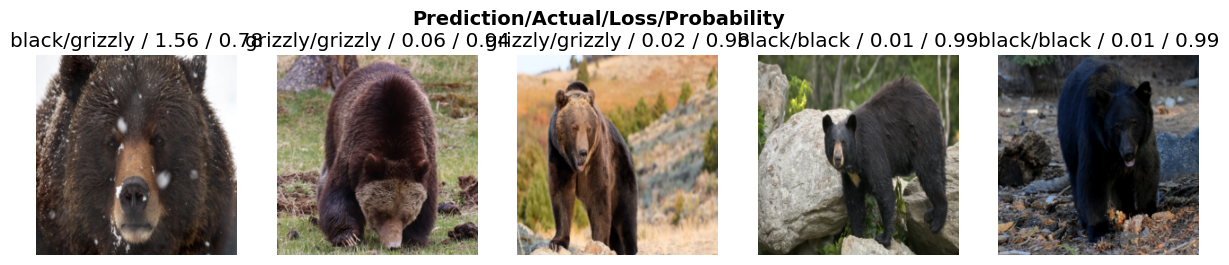

In [ ]:
interp.plot_top_losses(5, nrows=1)

GUI for data cleaning (allowing to choose a category and the training versus validation set and view the highest-loss images

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

to delete

In [ ]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()

To move images for which we've selected a different category, we would run:

In [ ]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

saving & exporting model

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
!ls

bears  export.pkl  images  sample_data


In [ ]:
learn_inf = load_learner(path/'export.pkl')

creating web ap using binder


button to upload image

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

button to classify

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9995')

click event handler

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
path = Path()
learn_inf = load_learner(path/'export.pkl', cpu=True)
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

FileNotFoundError: [Errno 2] No such file or directory: 'export.pkl'